**TWITTER US AIRLINE SENTIMENT DATASET ANALYSIS**

In [48]:
# Loading 'Twitter US Airline Sentiment' Dataset
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Tweets.csv')
df.head()     # Reading the head of the dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [49]:
# Checking the shape and the details of the features including their datatype in the dataset
print("Shape of the dataframe is : {}\n".format(df.shape))
print("Information contained in the dataframe : \n")
df.info()

Shape of the dataframe is : (14640, 15)

Information contained in the dataframe : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 

**EXPLORATORY DATA ANALYSIS**

In [50]:
# FEATURE EXTRACTION
# Checking the percentage of null values in each column. 
# This gives an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.
print("Percentage of NULL/NA values in data frame: \n")
(df.isna().sum() * 100 / df.index.size).round(2)

Percentage of NULL/NA values in data frame: 



tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**The above analysis shows that the columns 'airline_sentiment_gold', 'negativereason_gold' and 'tweet_coord' contain more than 90% null values hence they hold no significance and can be dropped.**

In [51]:
# Dropping the above listed columns with null values
df.drop(["airline_sentiment_gold", "negativereason_gold", "tweet_coord"], axis=1, inplace=True)

In [52]:
# Apart from these, dropping the columns which would not help during prediction 
df.drop(columns=['name','tweet_id','retweet_count','tweet_location','negativereason_confidence'],inplace=True)

In [53]:
# The column 'airline_sentiment_confidence' gives an estimate regarding the strength of the label given to the corresponding
# tweet. 'airline_sentiment' with confidence values less than < 0.4 may or may not be the correct label so its convenient to
# drop the corresponding rows.
df=df[df['airline_sentiment_confidence'] >0.4]

In [54]:
# Analyzing the relationship between the 'airline_sentiment' and the 'airline' by grouping the data on the basis 
# of the airline.
airline_sents = dict(df.groupby(["airline"])['airline_sentiment'].count().sort_values(ascending=False))
print(airline_sents)  # Total number of tweets associated with each airline

{'United': 3760, 'US Airways': 2876, 'American': 2733, 'Southwest': 2372, 'Delta': 2169, 'Virgin America': 494}


In [55]:
# Obtaining the number of positive, negative and neutral tweets corresponding to each airline
print(df.groupby(["airline"])['airline_sentiment'].value_counts())

airline         airline_sentiment
American        negative             1956
                neutral               447
                positive              330
Delta           negative              938
                neutral               700
                positive              531
Southwest       negative             1176
                neutral               641
                positive              555
US Airways      negative             2253
                neutral               367
                positive              256
United          negative             2613
                neutral               675
                positive              472
Virgin America  negative              179
                neutral               167
                positive              148
Name: airline_sentiment, dtype: int64


<Figure size 1152x2304 with 0 Axes>

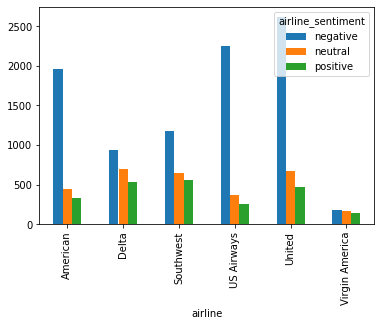

In [56]:
# Plotting the above observation
plt.figure(figsize=(16, 32))
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

**This shows that United, US Airways and American airlines substantially get negative reactions whereas the tweets for Virgin America are the most balanced.**

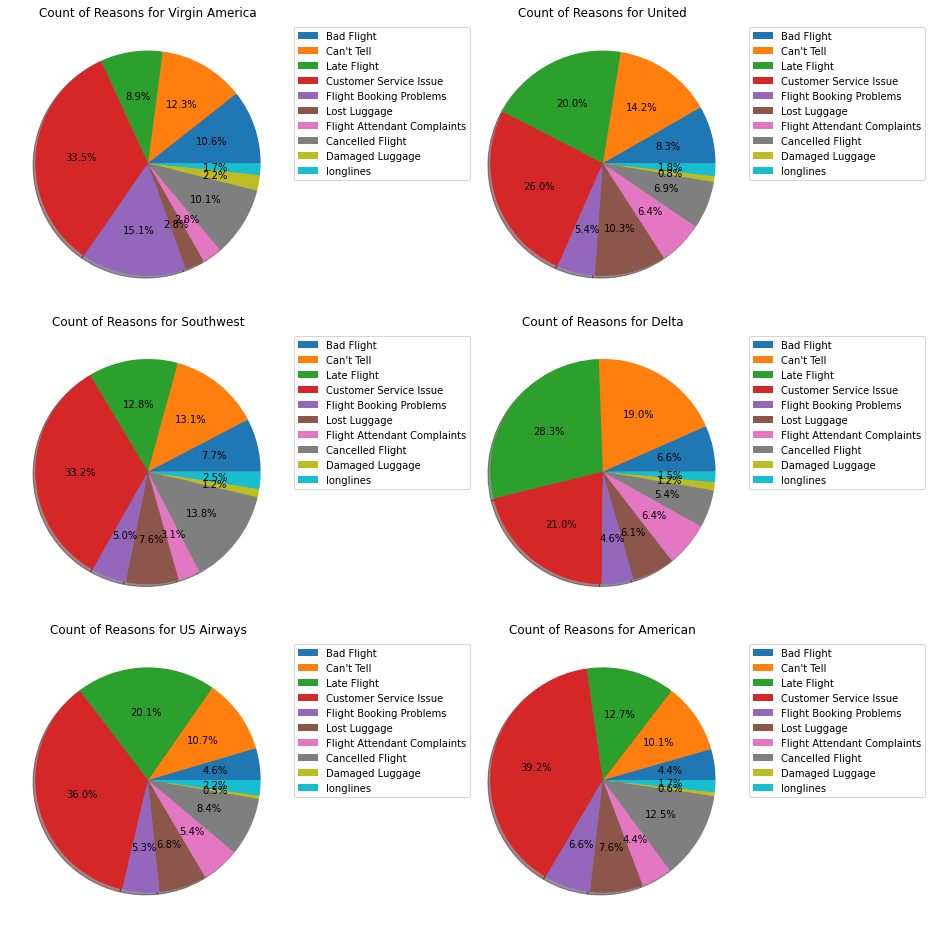

In [57]:
# Negative tweets reason analysis
# Making a dataframe for the unique negative reasons along with their value counts
NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        df1=df
    else:
        df1=df[df['airline']==Airline] # making a dataframe only with data of a particular airline
    count=dict(df1['negativereason'].value_counts())# total number of negative reasons of that airline
    Unique=list(df['negativereason'].unique()) # list of unique negative reasons in whole df
    Unique=[x for x in Unique if str(x) != 'nan'] # removing nan values from unique negative reasons
    Rframe=pd.DataFrame({'Reasons':Unique}) # Making a dataframe for the unique negative reasons
    Rframe['count']=Rframe['Reasons'].apply(lambda x: count[x]) # storing the count of each unique reason  
    return Rframe

# Plotting a pie chart to visualize the percentage of all unique negative reasons
plt.figure(1,figsize=(13, 13))
airlines = list(df["airline"].unique())
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(3,2,indices+1)
    plt.subplots_adjust(hspace=0.2) # for adjusting the space between each subplot
    df1=NR_Count(i)
    count=df1['count']
    labels=df1['Reasons']
    plt.pie(df1['count'],autopct='%1.1f%%',shadow = True)
    plt.legend(labels, bbox_to_anchor=(1,1)) #The bbox_to_anchor keyword is used for manual legend placement. 
    plt.title('Count of Reasons for '+i)
    plt.tight_layout() 

**The pie charts indicate the percentage of different reasons for negative tweets for all airways.<br>
 We see that the reason which has the highest percentage in Delta Airlines is for late flight and in the other Airlines, Customer service issue is the most common reason.**

In [58]:
# Analysing the 'tweet_created' column and its association with 'airline_sentiment'
# Removing the timezone information from the column and retaining the required date
df.tweet_created = pd.to_datetime(df.tweet_created)
print(df.tweet_created)
df.tweet_created = df.tweet_created.dt.date # Returns numpy array of python datetime.date objects
print(df.tweet_created)

0       2015-02-24 11:35:52-08:00
2       2015-02-24 11:15:48-08:00
3       2015-02-24 11:15:36-08:00
4       2015-02-24 11:14:45-08:00
5       2015-02-24 11:14:33-08:00
                   ...           
14634   2015-02-22 12:01:02-08:00
14636   2015-02-22 11:59:46-08:00
14637   2015-02-22 11:59:15-08:00
14638   2015-02-22 11:59:02-08:00
14639   2015-02-22 11:58:51-08:00
Name: tweet_created, Length: 14404, dtype: datetime64[ns, pytz.FixedOffset(-480)]
0        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
5        2015-02-24
            ...    
14634    2015-02-22
14636    2015-02-22
14637    2015-02-22
14638    2015-02-22
14639    2015-02-22
Name: tweet_created, Length: 14404, dtype: object


In [59]:
# Grouping the dataset to analyse the number of tweets sent out on each date 
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
print(day_df)

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               83
                                                   ... 
2015-02-24     United          neutral               47
                               positive              24
               Virgin America  negative              10
                               neutral                6
                               positive              12
Length: 136, dtype: int64


In [60]:
# Extracting only the count of tweets with negative sentiment for the various airlines for a given date
day_df = day_df.loc(axis=0)[:,:,'negative']
day_df.head()

tweet_created  airline     airline_sentiment
2015-02-16     Delta       negative               1
               United      negative               2
2015-02-17     Delta       negative             108
               Southwest   negative             212
               US Airways  negative             232
dtype: int64

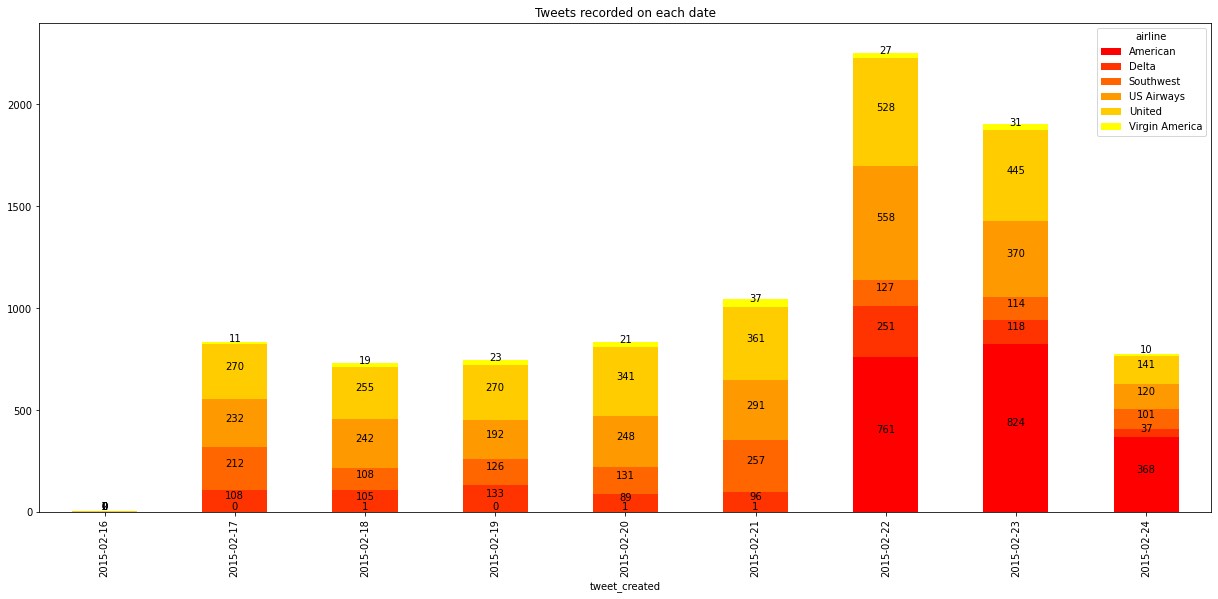

In [61]:
# Plotting the grouped data obtained above to visualise the change in the trend of sending out negative tweets for each airline.
ax = day_df.groupby(['tweet_created', 'airline']).sum().unstack().plot(kind='bar', ylim = (0, 2400), stacked=True, figsize = (21,9), colormap='autumn', title = "Tweets recorded on each date")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()# getting height and width of each substack of a bar
    x, y = p.get_xy() # getting the starting points(lower-left) of each substack
    ax.text(x+width/2, y+height/2, '{}'.format(int(height)), horizontalalignment='center', verticalalignment='bottom')
plt.show()

**This stacked bar graph indicates that there has been sudden upsurge in the negative tweets for the 'AMERICAN' airlines on 23-02-2015 which reduced to less than half the next day indicating that 'AMERICAN' airlines have been improving their services.**

**However, the tweets distribution for the rest of the airlines have been skewed.**

In [62]:
# Analysing the relation between tweets and timezone of the users
tz_counts = dict(df.groupby(["user_timezone"])['airline_sentiment'].count().sort_values(ascending=False))
print(tz_counts)

{'Eastern Time (US & Canada)': 3678, 'Central Time (US & Canada)': 1907, 'Pacific Time (US & Canada)': 1180, 'Quito': 732, 'Atlantic Time (Canada)': 488, 'Mountain Time (US & Canada)': 360, 'Arizona': 221, 'London': 195, 'Alaska': 107, 'Sydney': 105, 'Hawaii': 100, 'Amsterdam': 74, 'America/Chicago': 36, 'Indiana (East)': 26, 'America/New_York': 25, 'Paris': 25, 'Abu Dhabi': 23, 'Brasilia': 23, 'Greenland': 17, 'Dublin': 17, 'Santiago': 17, 'Tehran': 17, 'Athens': 16, 'New Delhi': 15, 'America/Los_Angeles': 15, 'Casablanca': 15, 'Mid-Atlantic': 15, 'Buenos Aires': 14, 'Central America': 13, 'Beijing': 11, 'Brisbane': 10, 'Berlin': 9, 'Brussels': 9, 'Tijuana': 9, 'Helsinki': 9, 'Caracas': 8, 'Melbourne': 8, 'Madrid': 7, 'Adelaide': 7, 'Taipei': 6, 'Bogota': 5, 'Seoul': 5, 'Rome': 5, 'Edinburgh': 4, 'Bangkok': 4, 'Stockholm': 4, 'Jerusalem': 3, 'America/Boise': 3, 'Mazatlan': 3, 'Guadalajara': 3, 'Mexico City': 3, 'Vienna': 3, 'New Caledonia': 3, 'La Paz': 3, 'Copenhagen': 2, 'Islamabad'

In [63]:
# Extracting the most common time-zone information which recorded the maximum tweets
from collections import Counter
timezone_tweets = dict(Counter(tz_counts).most_common(10))
print(timezone_tweets)

{'Eastern Time (US & Canada)': 3678, 'Central Time (US & Canada)': 1907, 'Pacific Time (US & Canada)': 1180, 'Quito': 732, 'Atlantic Time (Canada)': 488, 'Mountain Time (US & Canada)': 360, 'Arizona': 221, 'London': 195, 'Alaska': 107, 'Sydney': 105}


**The Eastern Time (US & Canada) recorded the maximum number of tweets which indicates that the majority of the travellers reside here and comprises a significant proportion of the valuable customers for each airline. Hence, the airlines must take care while dealing with them.**

**DATA PRE-PROCESSING**

In [64]:
# Importing the required libraries
!pip install emoji
import emoji
import re #regular expression
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Removing the twitter handles from the start of the tweet 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
df['text_without@'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")#\w here means any word or character, so we are removing the twitter handles that start with @ followed by a word.

In [66]:
# Carrying out the normalisation, stop-word removal, lemmatizing the words (reducing them to root words) and returning the cleaned tweets
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words(fileids='english')
le = WordNetLemmatizer()
def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet)) # Turn emojis into words
    new_tweet = re.sub(r'http\S+', '',new_tweet) # Remove URLs
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9#\s]', '', new_tweet) # Remove punctuation
    new_tweet = new_tweet.split(" ")
    new_tweet = list(map(lambda x: le.lemmatize(x), new_tweet)) # lemmatizing the words
    new_tweet = list(map(lambda x: x.strip(), new_tweet)) # Stripping whitespace from the words
    if '' in new_tweet:
        new_tweet.remove('')
    new_tweet = [word for word in new_tweet if word not in stop] # stopwords removal
    new_tweet = " ".join([word for word in new_tweet])
    return new_tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# Applying the natural language preprocessing to the column with removed twitter handles
df['clean_tweet'] = df['text_without@'].apply(process_tweet)

In [68]:
# Printing the final dataset
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,tweet_created,user_timezone,text_without@,clean_tweet
0,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,Eastern Time (US & Canada),What said.,said
2,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Central Time (US & Canada),I didn't today... Must mean I need to take an...,didnt today must mean need take another trip
3,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""en...",really aggressive blast obnoxious entertainmen...
4,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing
5,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,Pacific Time (US & Canada),seriously would pay $30 a flight for seats th...,seriously would pay dollar flight seat didnt p...


In [69]:
# Analysing the words in the hashtags in each tweet
# Defining the function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [70]:
# Extracting the hashtags from each tweet according to their sentiment value 
# All positive sentiment hashtags are grouped together, then the negative sentiments followed by the neutral sentiments
tweet_sentiments = ["positive", "negative", "neutral"]
sentiment_hashtags = []

for sent in tweet_sentiments:
  hashtag = hashtag_extract(df['clean_tweet'][df['airline_sentiment'] == sent])
  hashtag = sum(hashtag,[])
  sentiment_hashtags.append(hashtag)
print(sentiment_hashtags)

[['fabulous', 'seductive', 'stress', '29daystogo', 'moodlitmonday', 'elevategold', 'guiltypleasures', 'inflight', 'flightattendant', 'dreampath', 'customerservice', 'virginamerica', 'flying', 'cheapflights', 'farecompare', 'cheapflights', 'farecompare', 'vabeatsjblue', 'oscars', 'redcarpet', 'oscars', 'oscars2015', 'irmafromdallas', 'princesshalf', 'flight', 'dc', 'sunset', 'globe', 'backtowinter', 'work', 'refreshed', 'elevate', 'gold', 'americanairlines', 'beatstheothers', 'seriously', 'meetthefleet', 'oscars', 'disruption', 'fcmostinnovative', 'incubator', 'airplanemodewason', 'boston', 'sanfrancisco', 'vodkatonics', 'sfo', 'sweet', 'amazing', 'sorrynotsorry', 'comps', 'rockstars', 'travel', 'travel', 'san', 'sfo', 'sanfrancisco', 'livewelltraveled', 'sytycd', 'texas', 'moodlighting', 'thankyou', 'freeneversucks', 'virginamerica', 'weather', 'sciencebehindtheexperience', 'myvxexperience', 'wervirgin', 'fargo', 'letsgohome', '22', 'choosekind', 'california', 'unitedairlines', 'status

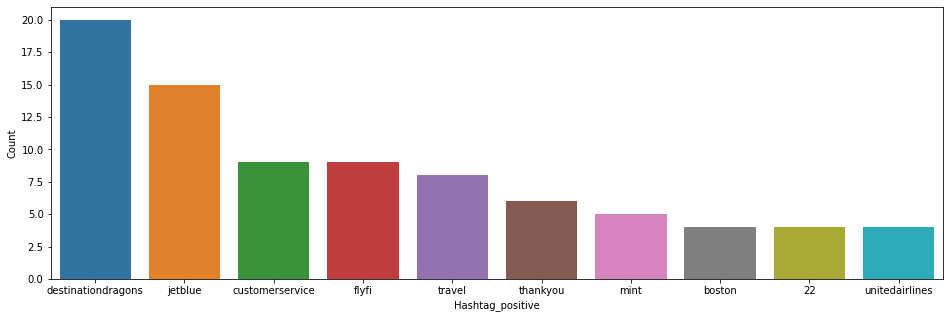

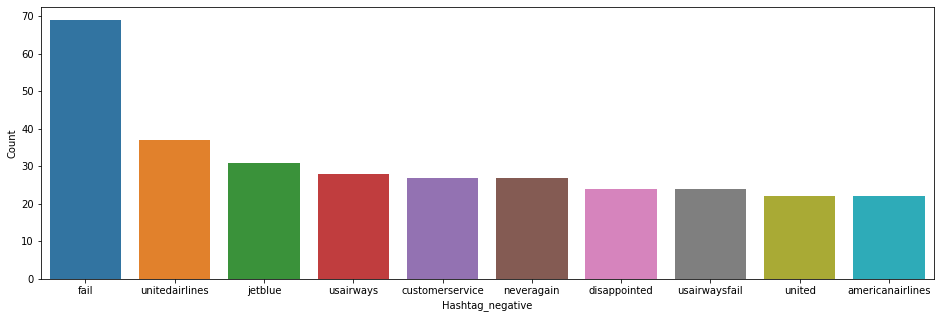

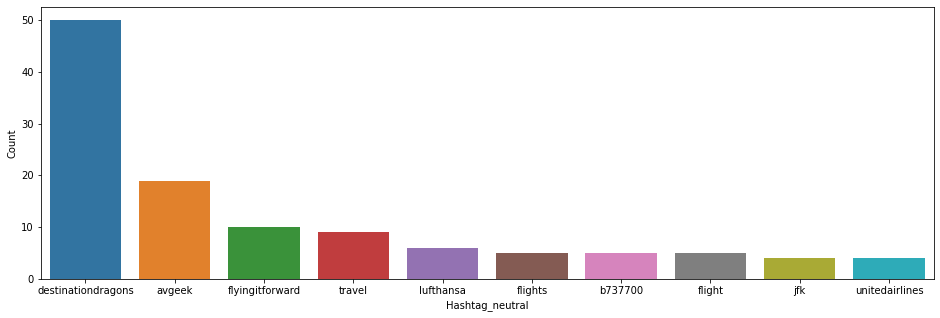

In [71]:
# Plotting the count of top 10 most frequently used words in positive, negative and neutral sentiment tweets
import seaborn as sns

def plot_frequent_ht(x, i):
  a = nltk.FreqDist(x)
  d = pd.DataFrame({"Hashtag" + "_" + tweet_sentiments[i]: list(a.keys()),"Count": list(a.values())})    
  d = d.nlargest(columns="Count", n = 10) 
  plt.figure(figsize=(16,5))
  ax = sns.barplot(data=d, x= "Hashtag" + "_" + tweet_sentiments[i], y = "Count")
  ax.set(ylabel = 'Count')
  plt.show()

for i in range(len(sentiment_hashtags)):
  plot_frequent_ht(sentiment_hashtags[i], i)

**The positive and negative sentiment tweets are of utmost importance for us therefore on analysing them we observed:**

**1. 'destinationdragons' and 'jetblue' are the airlines which offer great customer service facilities and people seem to be satisfied with them.**

**2. 'fail' is the keyword used often in the hashtags for negative tweets. People seem to be unsatisfied with 'united_airlines' services since it has been tagged quite frequently in negative tweets.**

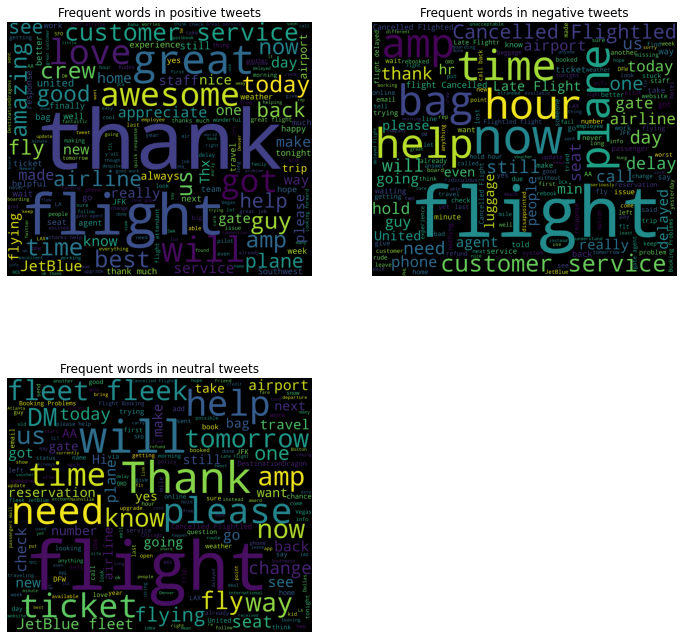

In [72]:
# Analysing the frequently occuring words in 'positive', 'negative' and 'neutral' sentiment
from wordcloud import WordCloud,STOPWORDS

fig = plt.figure(figsize=(12, 12))
for i in range(len(tweet_sentiments)):
  new_df=df[df['airline_sentiment']==tweet_sentiments[i]]
  words = ' '.join(new_df['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and word != 'RT'
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)
  ax = fig.add_subplot(221 + i)  #2x2 grid 1st subplot ,top-left
  ax.title.set_text("Frequent words in " + tweet_sentiments[i] + " tweets")                
  ax.imshow(wordcloud)
  ax.axis('off')

In [73]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,text,tweet_created,user_timezone,text_without@,clean_tweet
0,neutral,1.0000,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24,Eastern Time (US & Canada),What said.,said
2,neutral,0.6837,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Central Time (US & Canada),I didn't today... Must mean I need to take an...,didnt today must mean need take another trip
3,negative,1.0000,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""en...",really aggressive blast obnoxious entertainmen...
4,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing
5,negative,1.0000,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,Pacific Time (US & Canada),seriously would pay $30 a flight for seats th...,seriously would pay dollar flight seat didnt p...


**TRAINING AND TESTING THE MODELS**

In [74]:
(df.isna().sum() * 100 / df.index.size).round(2)

airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  36.72
airline                          0.00
text                             0.00
tweet_created                    0.00
user_timezone                   32.94
text_without@                    0.00
clean_tweet                      0.00
dtype: float64

In [75]:
# Separating the feature variables and the target variable from the dataset
X = df.drop(['airline_sentiment'],axis=1)
y = df['airline_sentiment']

In [76]:
# Performing 'Train-Test' split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)

In [77]:
# Tf-Idf vectorization to convert tweets in a format suitable for the models to be trained on
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(x_train['clean_tweet'])
tfidf_test = tfidf_vectorizer.transform(x_test['clean_tweet'])

In [78]:
# Importing required models and the metric functions
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

Classification report for naive-bayes:
               precision    recall  f1-score   support

    negative     0.7507    0.9763    0.8488      2782
     neutral     0.7312    0.2921    0.4175       866
    positive     0.8659    0.4599    0.6008       674

    accuracy                         0.7587      4322
   macro avg     0.7826    0.5761    0.6223      4322
weighted avg     0.7648    0.7587    0.7237      4322

Plotting the confusion matrix for naive-bayes:



<Figure size 432x288 with 0 Axes>

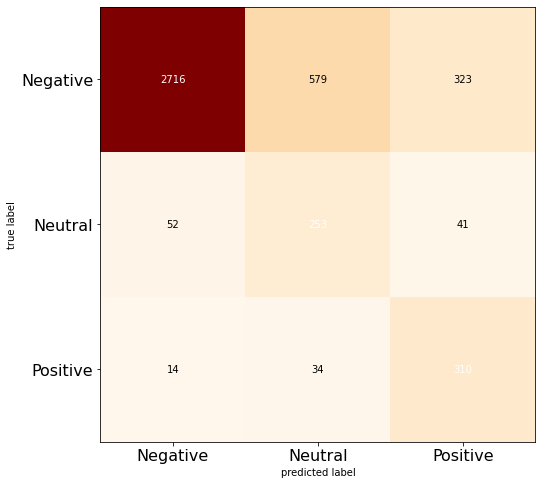

In [79]:
# Implementing NAIVE-BAYES classifier
clf = MultinomialNB()
fit = clf.fit(tfidf, y_train)
pred = clf.predict(tfidf_test)
print(f"Classification report for naive-bayes:\n {classification_report(y_test, pred, digits=4)}")
cm = confusion_matrix(pred , y_test)
print("Plotting the confusion matrix for naive-bayes:\n")
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap='OrRd')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

Classification report for decision tree:
               precision    recall  f1-score   support

    negative     0.8037    0.8049    0.8043      2778
     neutral     0.4885    0.4684    0.4782       903
    positive     0.5593    0.5881    0.5734       641

    accuracy                         0.7025      4322
   macro avg     0.6172    0.6205    0.6186      4322
weighted avg     0.7016    0.7025    0.7019      4322

Plotting the confusion matrix for decision tree:



<Figure size 432x288 with 0 Axes>

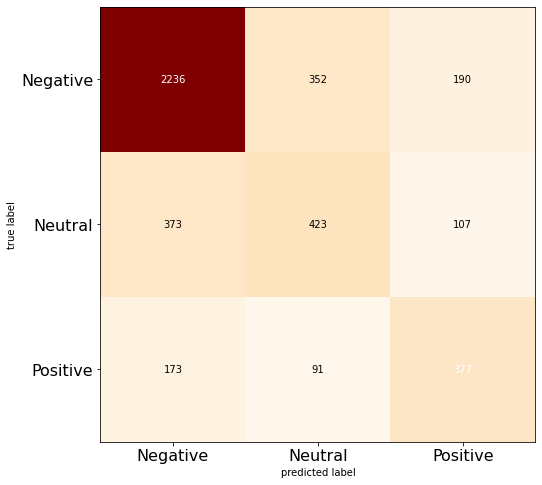

In [80]:
# Implementing DECISION TREE classifier
dc = DecisionTreeClassifier()
fit = dc.fit(tfidf,y_train)
pred = fit.predict(tfidf_test)
print(f"Classification report for decision tree:\n {classification_report(pred,y_test, digits=4)}")
cm = confusion_matrix(pred , y_test)
print("Plotting the confusion matrix for decision tree:\n")
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap='OrRd')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

Classification report for random forest:
               precision    recall  f1-score   support

    negative     0.9116    0.8186    0.8626      3098
     neutral     0.4908    0.6151    0.5459       691
    positive     0.5875    0.7430    0.6562       533

    accuracy                         0.7767      4322
   macro avg     0.6633    0.7255    0.6882      4322
weighted avg     0.8043    0.7767    0.7865      4322

Plotting the confusion matrix for random forest:



<Figure size 432x288 with 0 Axes>

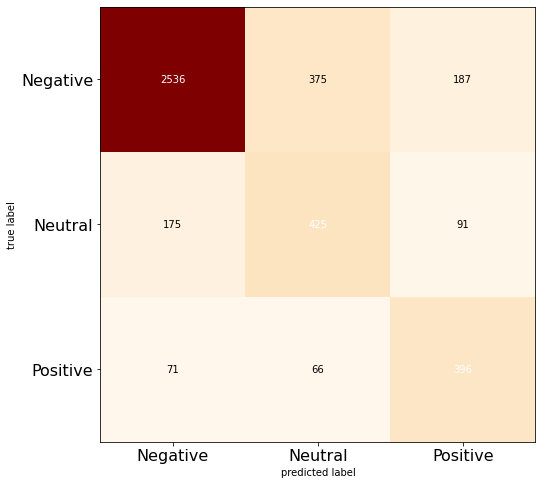

In [81]:
# Implementing RANDOM-FOREST classifier
rf = RandomForestClassifier(n_estimators=200)
fit = rf.fit(tfidf,y_train)
pred_rf = fit.predict(tfidf_test)
print(f"Classification report for random forest:\n {classification_report(pred_rf,y_test, digits=4)}")
cm = confusion_matrix(pred_rf , y_test)
print("Plotting the confusion matrix for random forest:\n")
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap='OrRd')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

***CONCLUSION:***

**RANDOM-FOREST classifier gives the best accuracy i.e. 0.78 for the given dataset.**

**However, any airline is more concerned regarding the negative tweets recorded expressing the customer unsatisfaction so that they can work upon that particular aspect where they fail. So, our focus should be on minimising the FALSE POSITIVES thereby increasing the PRECISION value. Considering this factor RANDOM-FOREST (weighted_precision:0.841 ) appears to be the best classifier followed by NAIVE-BAYES (weighted_precision: 0.769).**